# Image Classification
This is designed to show you a deep neural network in operation. It is also going to show you that computer vision techniques do not work exactly like the human brain and vision system.

For this lab, you will need some images of your choosing. They will need to live in a folder on the computer that you are using.

We're going to use Python and we're going to use a lot of existing packages. Most of this code is just calling the right Python functions in the right order.

First, we'll import some useful packages: opencv (which is used for computer vision) matplotlib (which we're going to use to display our images, and we'll inline it) and numpy (which is Python's basic number processing package). 

Note that you might need:
`!pip install <package name>`
if the packages are not already installed on your system.

In [11]:
import cv2 as cv2
import skimage as skimage
from skimage import io, data, color, filters
from matplotlib import pyplot as plt
import numpy as np

%matplotlib inline

You will need some images to run this notebook and it might be possible to get them from a webcam (in the cell below), or you can save images somewhere on the computer and upload them from the cell below that. Pick **either** the webcam option or the file option. 

*Note that if you take a picture of yourself, it will only exist on this computer as long as it is displayed in the notebook and/or the notebook is running. If you want to remove your image afterwards, you can simply re-run all the cells in the notebook with an image from a file.*

In [12]:
# Get images from a webcam
cap = cv2.VideoCapture(0)
success, img = cap.read()


In [15]:
import os
jupyter_root = "/Users/pam/Documents/dev/git/notes"
os.chdir(jupyter_root)
wd = os.getcwd()
print("The folder you might use for saving the images is: {}/images".format(wd))

The folder you might use for saving the images is: /Users/pam/Documents/dev/git/notes/images


In [16]:
# Get images from a file (remember you can use an absolute path if you're confused)
imageName = "images/tiger.bmp"
img = cv2.imread(imageName)


And now display it using matplotlib. I've put the code for showing an image and removing the matplotlib axes data into my own function, but there are other ways to do this.

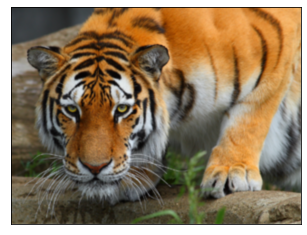

In [17]:
def showImage(image):
    # Switch the colours (because opencv actually reads BGR)
    display = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)    
    plt.imshow(display, interpolation = 'bicubic')
    plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
    plt.show()
showImage(img)

Now, let's see if we can use a machine learning classifier to classify our image. We're going to use the inception (InceptionV3) network from Google. This is an image classifier and we're going to use an "off the shelf" model from a Python package called keras. The model was trained on a huge dataset called "ImageNet". ImageNet contains a huge number of pictures of different things. Each image in ImageNet has a **label**. The label should name the biggest thing visible in the image. Approximately one third of ImageNet is pictures of different types of dogs, though.

The code below takes our image, resizes it (to 299x299 pixels) so that it will fit in the Inception model, and scales the values of each of the pixels so that instead of occupying the range 0-255 (like normal pixels) they come in the range -1 to 1.

In [18]:
from keras.applications.inception_v3 import InceptionV3
from keras.applications.imagenet_utils import decode_predictions

model = InceptionV3(include_top=True, weights='imagenet')
# We need to resize the image so that it's 299x299x3 pixels (i.e. height = width = 299 and three channels)
print(img.shape)
resized = cv2.resize(img, (299, 299), interpolation = cv2.INTER_AREA)
resized = np.expand_dims(resized, axis=0) # add it into a "list" of images - our list only has 1 image.
print(resized.shape)
# Optional: display resized like in the code above...

# And we also need to rescale the pixels
resized = resized/255.
resized -= 0.5
resized *= 2.

# Now do the prediction
preds = model.predict(resized)
print('Predicted:', decode_predictions(preds))

(240, 320, 3)
(1, 299, 299, 3)
1/1 [==============================] - 1s 1s/step
Predicted: [[('n02129604', 'tiger', 0.7700307), ('n02123159', 'tiger_cat', 0.19179721), ('n04266014', 'space_shuttle', 0.00044540607), ('n02128385', 'leopard', 0.00024795948), ('n02108422', 'bull_mastiff', 0.0002268313)]]


The text above should tell you what label the model has assigned to the image. Ok, it gives the top 5 labels because it's not always right (InceptionV3 is only right first time about 70% of the time). For each label, it tells you 
- the ImageNet class number (which is meaningless to us)
- the ImageNet class name (which you might understand)
- the confidence it has in that label

You might see some labels that match the image, but you might see some labels that do not match the image.
Let's see if we can find an easy way to fool the classifier.
Let's try a meme like [this one](https://me.me/i/harvesting-cotton-at-night-lookss-like-a-rock-concert-i-c5e7ec0fcba442108ecc06a6713bb99b). The image is already in our folder.

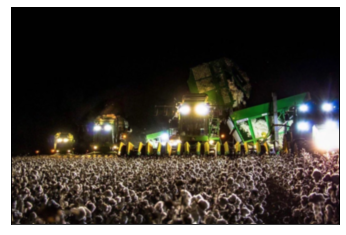

1/1 [==============================] - 0s 102ms/step
Predicted: [[('n04296562', 'stage', 0.93391174), ('n03496892', 'harvester', 0.017054345), ('n04286575', 'spotlight', 0.009866157), ('n03691459', 'loudspeaker', 0.0083339475), ('n03967562', 'plow', 0.007949401)]]


In [19]:
imageName_cotton = "images/cotton_field.png"
#imageName_cotton = "images/STOP_sign_vandalised.png"
img_cotton = cv2.imread(imageName_cotton)
showImage(img_cotton)
resized_cotton = cv2.resize(img_cotton, (299, 299), interpolation = cv2.INTER_AREA)
resized_cotton = np.expand_dims(resized_cotton, axis=0) # add it into a "list" of images - our list only has 1 image.

# And we also need to rescale the pixels
resized_cotton = resized_cotton/255.
resized_cotton -= 0.5
resized_cotton *= 2.

# Now do the prediction
preds_cotton = model.predict(resized_cotton)
print('Predicted:', decode_predictions(preds_cotton))

Ok, maybe the computer vision is just as good as our own in this case. Let's see if we can find any differences.

If you used the "Tiger" example, you might have noticed that one of the labels in the top 5 is "space_shuttle". Can we deliberately fool the classifier?

First, let's get a picture of a space shuttle:

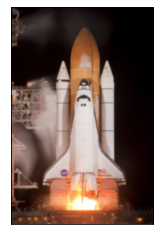

In [20]:
# Get images from a file (remember you can use an absolute path if you're confused)
imageName2 = "images/spaceshuttle.jpg"
img2 = cv2.imread(imageName2)
showImage(img2)


Now, let's run the classifier:

In [21]:
resized2 = cv2.resize(img2, (299, 299), interpolation = cv2.INTER_AREA)
resized2 = np.expand_dims(resized2, axis=0) # add it into a "list" of images - our list only has 1 image.
# Optional: display resized like in the code above...

# And we also need to rescale the pixels
resized2 = resized2/255.
resized2 -= 0.5
resized2 *= 2.

# Now do the prediction
preds2 = model.predict(resized2)
print('Predicted:', decode_predictions(preds2))

1/1 [==============================] - 0s 114ms/step
Predicted: [[('n04266014', 'space_shuttle', 0.9943773), ('n02510455', 'giant_panda', 0.0001673761), ('n03773504', 'missile', 7.944153e-05), ('n01742172', 'boa_constrictor', 7.623275e-05), ('n02102040', 'English_springer', 5.5833367e-05)]]


Now, let's combine the space shuttle image with the tiger image and see if it changes things. They're combined as number arrays, just half and half.

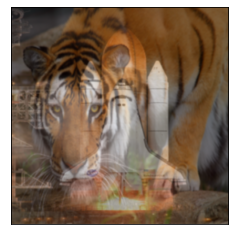

In [22]:
resized1 = cv2.resize(img, (299, 299), interpolation = cv2.INTER_AREA) #The tiger image
resized2 = cv2.resize(img2, (299, 299), interpolation = cv2.INTER_AREA) # The space shuttle

mixed = (resized1*0.5).astype(np.ubyte) + (resized2*0.5).astype(np.ubyte)

showImage(mixed)

Ok, so our human eyes can see both images when they're mixed 50:50. What does the deep model think?

In [23]:
# Remember to rescale the pixels for the model
mixed = np.expand_dims(mixed, axis=0) 
mixed = mixed/255.
mixed -= 0.5
mixed *= 2.

# Now do the prediction
preds_mixed = model.predict(mixed)
print('Predicted:', decode_predictions(preds_mixed))

1/1 [==============================] - 0s 130ms/step
Predicted: [[('n02129604', 'tiger', 0.68451387), ('n02123159', 'tiger_cat', 0.121830925), ('n02391049', 'zebra', 0.0053928853), ('n02128925', 'jaguar', 0.0052019525), ('n02128757', 'snow_leopard', 0.003201917)]]


Ok, now the model still mostly sees a tiger!

Let's run that again but this time, minimise one of the images (so not 50:50, maybe 90:10, maybe you can experiment here to see if you can find a combination of images (you can choose your own images if you like) that fools the classifier but doesn't fool the human).

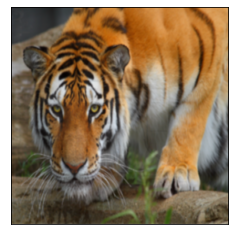

1/1 [==============================] - 0s 125ms/step
Predicted: [[('n02129604', 'tiger', 0.7660881), ('n02123159', 'tiger_cat', 0.20219076), ('n04266014', 'space_shuttle', 0.00040361745), ('n02128385', 'leopard', 0.00026389852), ('n02115913', 'dhole', 0.0001886728)]]


In [121]:
imageName1 = "images/tiger.bmp"
img1 = cv2.imread(imageName1)
imageName2 = "images/spaceshuttle.jpg"
img2 = cv2.imread(imageName2)


resized1 = cv2.resize(img1, (299, 299), interpolation = cv2.INTER_AREA) #The tiger image
resized2 = cv2.resize(img2, (299, 299), interpolation = cv2.INTER_AREA) # The space shuttle
mixed = (resized1*0.9).astype(np.ubyte) + (resized2*0.1).astype(np.ubyte)
showImage(mixed)

#And predict (should really make a function for this...)
# Remember to rescale the pixels for the model
mixed = np.expand_dims(mixed, axis=0) 
mixed = mixed/255.
mixed -= 0.5
mixed *= 2.

# Now do the prediction
preds_mixed = model.predict(mixed)
print('Predicted:', decode_predictions(preds_mixed))

Now you know how image classifiers work, and you know how to combine images to change the classifications. Think of how this might affect applications (like self driving cars) which also use computer vision.

The last part of this uses the webcam and performs **object detection**. This is different to image classification because object detection draws bounding boxes round objects within the image (image classification simply labels the whole image and can sometimes get confused).

__YOLO__
 YOLO stands for "You Only Look Once" and is the current state of the art in object detection. It runs almost in real time. The final two cells of this notebook download a pre-trained YOLO model and run it using our webcam. You can try to find the limits of the model by holding different things up to the camera.

In [7]:
!git clone https://github.com/ultralytics/yolov5  # clone
%cd yolov5
%pip install -qr requirements.txt  # install

import torch
import utils
display = utils.notebook_init()  # checks

YOLOv5 🚀 v6.1-253-g75bbaa8 Python-3.9.12 torch-1.11.0 CPU


Setup complete ✅ (8 CPUs, 16.0 GB RAM, 430.2/465.7 GB disk)


In [8]:
!python detect.py --weights yolov5s.pt --img 640 --conf 0.25 --source 0
display.Image(filename='runs/detect/exp/zidane.jpg', width=600)

detect: weights=['yolov5s.pt'], source=0, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv5 🚀 v6.1-253-g75bbaa8 Python-3.9.12 torch-1.11.0 CPU

100%|██████████████████████████████████████| 14.1M/14.1M [00:00<00:00, 21.8MB/s]

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
1/1: 0...  Success (inf frames 1280x720 at 30.00 FPS)

0: 384x640 Done. (0.234s)
0: 384x640 Done. (0.194s)
0: 384x640 Done. (0.189s)
0: 384x640 1 person, Done. (0.196s)
0: 384x640 1 person, Done. (0.197s)
0: 384x640 1 person, 1 laptop, Done. (0.204s)
0: 384x640 1 person, Done. (0.229s)
0: 384x640 1 person, Done. (0.216s)
0: 384x640 1 person, Done. (0.198s

FileNotFoundError: [Errno 2] No such file or directory: 'runs/detect/exp/zidane.jpg'